# Introdução à Análise de Dados com Python
Este notebook apresenta operações básicas para análise de dados, incluindo manipulação e visualização de dados utilizando as bibliotecas `pandas` e `matplotlib`. 

In [9]:
#%pip install pandas
#%pip install openpyxl
#%pip install matplotlib

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Leitura de Dados
Vamos trabalhar com um arquivo Excel que contém duas tabelas:
- **Vendas**: Informações sobre as vendas realizadas.
- **Clientes**: Informações sobre os clientes.

Carregamos os dados abaixo:

In [17]:
# Carregar os dados
vendas = pd.read_excel('dados_vendas_novos.xlsx', sheet_name='Vendas')
clientes = pd.read_excel('dados_vendas_novos.xlsx', sheet_name='Clientes')
vendas.head(), clientes.head()

(   ID Cliente    Produto  Valor       Data
 0           7  Produto C   1595 2023-01-01
 1          20  Produto D   3404 2023-01-02
 2          15  Produto D   3863 2023-01-03
 3          11  Produto B   1953 2023-01-04
 4           8  Produto C   4759 2023-01-05,
    ID Cliente    Nome        Região
 0           1    João      Nordeste
 1           2   Maria           Sul
 2           3   Pedro           Sul
 3           4     Ana  Centro-Oeste
 4           5  Carlos      Nordeste)

In [25]:
vendas.describe()

,ID Cliente,Valor,Data
count,100.000000,100.00000,100
mean,10.010000,2705.32000,2023-02-19 12:00:00
min,1.000000,198.00000,2023-01-01 00:00:00
25%,5.750000,1745.00000,2023-01-25 18:00:00
50%,9.500000,2990.00000,2023-02-19 12:00:00
75%,15.000000,3802.75000,2023-03-16 06:00:00
max,20.000000,4837.00000,2023-04-10 00:00:00
std,5.535003,1344.94825,NaN


In [26]:
clientes.describe()

,ID Cliente
count,20.00000
mean,10.50000
std,5.91608
min,1.00000
25%,5.75000
50%,10.50000
75%,15.25000
max,20.00000


## 2. Transformação e Manipulação de Dados
### 2.1 Filtros Simples
Filtrar as vendas acima de R$1000.

In [18]:
# Filtrar vendas acima de R$1000
vendas_acima_1000 = vendas[vendas['Valor'] > 1000]
vendas_acima_1000

,ID Cliente,Produto,Valor,Data
0,7,Produto C,1595,2023-01-01
1,20,Produto D,3404,2023-01-02
2,15,Produto D,3863,2023-01-03
3,11,Produto B,1953,2023-01-04
4,8,Produto C,4759,2023-01-05
...,...,...,...,...
94,8,Produto D,4167,2023-04-05
96,2,Produto C,4593,2023-04-07
97,1,Produto C,1400,2023-04-08
98,16,Produto B,4087,2023-04-09


### 2.2 Filtros com `isin`
Selecionar clientes das regiões 'Sul' e 'Sudeste'.

In [19]:
# Filtrar clientes das regiões 'Sul' e 'Sudeste'. Muito bom quando se tem vários elementos para filtrar de uma vez só
clientes_filtrados = clientes[clientes['Região'].isin(['Sul', 'Sudeste'])]
clientes_filtrados

,ID Cliente,Nome,Região
1,2,Maria,Sul
2,3,Pedro,Sul
10,11,Ricardo,Sudeste
12,13,Marcelo,Sul
14,15,Rafael,Sul


### 2.3 Cruzamento de Bases
Vamos combinar as tabelas de vendas e clientes usando a coluna `ID Cliente`. Isso nos permitirá ter informações mais completas sobre cada venda.

In [20]:
# Cruzar as tabelas de vendas e clientes
vendas_completas = pd.merge(vendas, clientes, on='ID Cliente', how='inner')
vendas_completas

,ID Cliente,Produto,Valor,Data,Nome,Região
0,7,Produto C,1595,2023-01-01,Paula,Norte
1,20,Produto D,3404,2023-01-02,Larissa,Centro-Oeste
2,15,Produto D,3863,2023-01-03,Rafael,Sul
3,11,Produto B,1953,2023-01-04,Ricardo,Sudeste
4,8,Produto C,4759,2023-01-05,Roberto,Nordeste
...,...,...,...,...,...,...
95,12,Produto D,260,2023-04-06,Claudia,Norte
96,2,Produto C,4593,2023-04-07,Maria,Sul
97,1,Produto C,1400,2023-04-08,João,Nordeste
98,16,Produto B,4087,2023-04-09,Camila,Norte


In [32]:
# Agrupar as vendas por Produto e Região e calcular o total de vendas
vendas_por_produto_regiao = vendas_completas.groupby(['Produto', 'Região'])['Valor'].sum()
vendas_por_produto_regiao


Produto    Região      
Produto A  Centro-Oeste      866
           Nordeste        30274
           Norte           19935
           Sudeste          5759
           Sul              7926
Produto B  Centro-Oeste     5110
           Nordeste        29038
           Norte           12043
           Sudeste          1953
           Sul             12961
Produto C  Centro-Oeste    15627
           Nordeste        28829
           Norte           19341
           Sudeste          3557
           Sul             20084
Produto D  Centro-Oeste    17952
           Nordeste        13847
           Norte           12843
           Sul             12587
Name: Valor, dtype: int64

## 3. Visualização de Dados
Vamos criar alguns gráficos para explorar os dados.

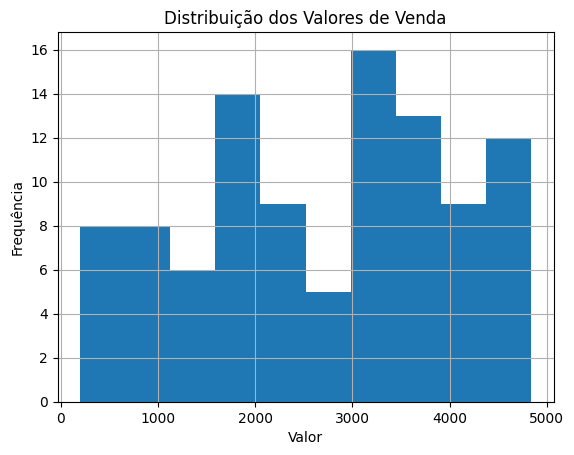

In [21]:
# Gráfico de distribuição dos valores de venda
vendas['Valor'].hist(bins=10)
plt.title('Distribuição dos Valores de Venda')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

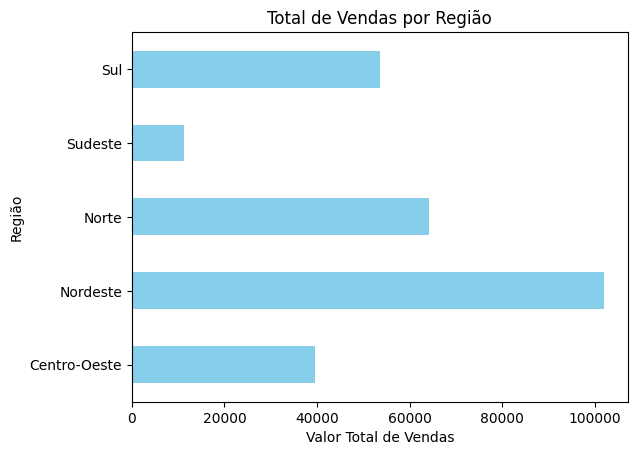

In [23]:
# Gráfico de barras horizontais: vendas por região
vendas_por_regiao = vendas_completas.groupby('Região')['Valor'].sum()
vendas_por_regiao.plot(kind='barh', color='skyblue')
plt.title('Total de Vendas por Região')
plt.xlabel('Valor Total de Vendas')
plt.ylabel('Região')
plt.show()


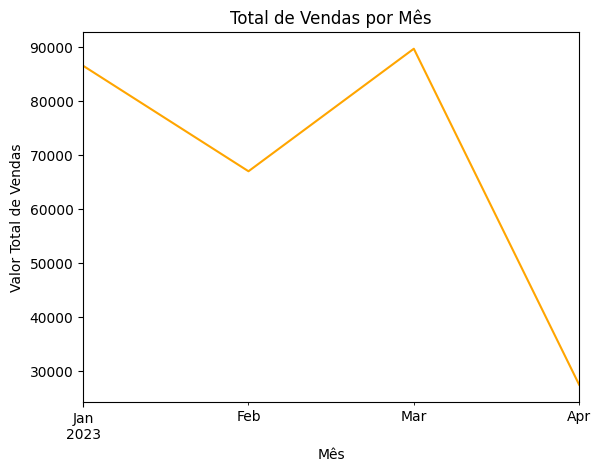

In [30]:
# Converter a coluna 'Data' para datetime
vendas['Data'] = pd.to_datetime(vendas['Data'])

# Agregar vendas por mês
vendas_por_mes = vendas.groupby(vendas['Data'].dt.to_period('M'))['Valor'].sum()
vendas_por_mes.plot(kind='line', color='orange')
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.show()
